In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
irisd=load_iris()

### 데이터 클래스 정보
* 'data': 데이터
* 'target' : 라벨
* 'target_names': 라벨 컬럼
* 'feature_names': 데이터 컬럼
* 'DESCR': 설명
* 

In [3]:
irisd['target']
# 타켓이 정렬되어 있다 => 데이터가 독립적이지 않다 => 데이터를 학습시 섞어야 한다
# 데이터셋 구분(train,test)이 없으니 데이터셋 구분시에 셔플이 필요

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
print(irisd['target_names'],irisd['target'].shape)

['setosa' 'versicolor' 'virginica'] (150,)


In [5]:
irisdf=pd.DataFrame(data=irisd['data'],columns=irisd['feature_names'])
irisdf['target']=irisd['target']
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 기초통계분석
* describe 결과 :
    - 평균 분산에서 유의한 차이가 있을것으로 예상된다.
    - 사분위수 만으로 형태 파악 어려워 시각화

In [6]:
irisdf.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### 기초 시각화
* 히스토그램
* 전체적 데이터 분포 확인

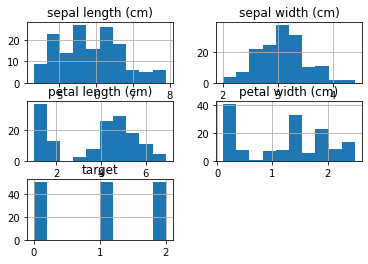

In [7]:
irisdf.hist()
plt.show()

### 기초 통계 시각화
* 박스플롯
- 극단치 왜도 첨도 분포 등으로 통해 유의한 차이가 있는지 분석

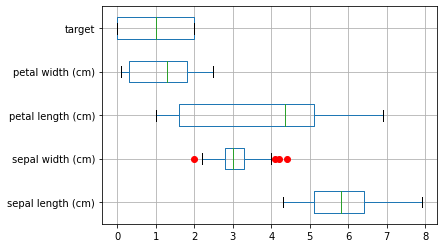

In [8]:
irisdf.boxplot( vert=0,sym="ro")
plt.show()

### 상대분석
* 상대적 영향력이나 선형성 분석을 위한 시각화
* 시각적 직관을 통해서 추후 분석및 학습 방향을 예상


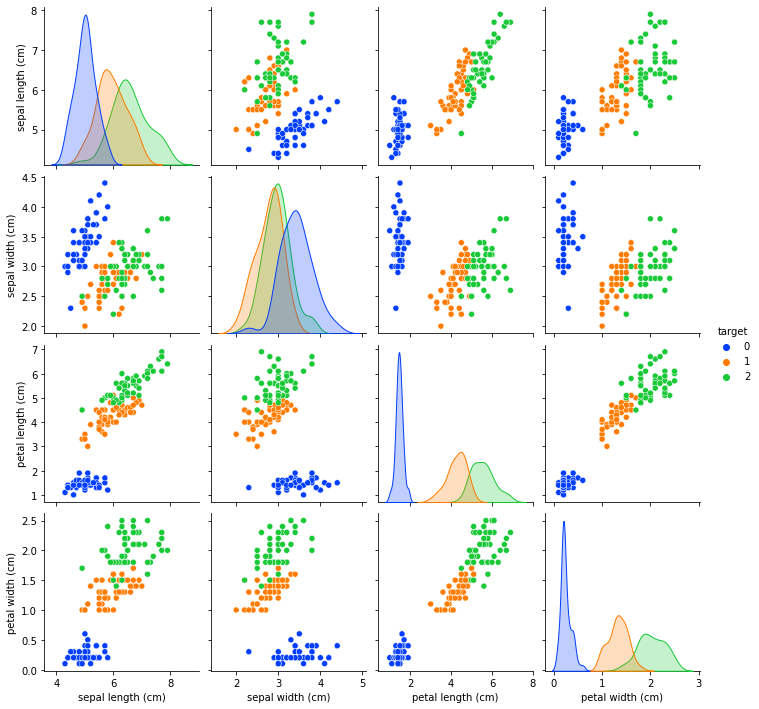

In [9]:
irisf=irisdf[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
sns.pairplot(irisdf,hue='target',palette='bright')
plt.show()

### 목표: sepal petal의 폭과 길이를 통해 품종을 구별하는 모델을 구축
- 과정
    * DT등을 사용하여 분류 모델을 학습
    * DL을 통해서 분류 모델 학습
- 머신러닝 준비
    * 데이터 정제: 동일 데이터 타입, 동일 조건
    * 타겟 라벨링: 분류모델의 경우 one-hot 인코딩
    * one-hot encoding: 명확한 분류를 위해 타겟(라벨)을 배열로 표시
        - 이유: 머신러닝 입장에서도 확률기반의 판단
        - 확률기반 판단: 각 라벨로 보여질 수 있는 확률을 계산
        - ML 의 답: [0.15,0.25,0.6,0.1]
        - 사용자가 원하는 답: [0,0,1,0]
    * 머신러닝의 평가를 위한 준비:
        - 자료를 test set 과 train set 으로 분리
        - test set 을 통해 모델을 검증
    * 학습모델 결정:
        - 피처특성:(컬럼 숫자, 타겟의 분류 숫자)
            * 작음: ML/통계
            * 크다: DL
        - 데이터셋의 크기
            * 작다: ML 을 사용
            * 크다: DL 가능
        - 사전 통계 검증
            * 뚜렷한 분류 가능: ML
            * 모호한 분류: DL
      

In [10]:
# ML DT모델 준비
from sklearn.tree import DecisionTreeClassifier
# ML train set 준비
from sklearn.model_selection import train_test_split

### train_test_split
* train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)
- (1) Parameter
    * arrays : 분할시킬 데이터를 입력 (Python list, Numpy array, Pandas dataframe 등..)->X,Y를 넣어야 test_x,train_x,test_y,train_y 로 나옴
    * test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)
    * train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지)
    * random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값 (int나 RandomState로 입력) 기본적으로 숫자로 지정=> 여러모델 테스트시 일정한 값 유지
    * shuffle : 셔플여부설정 (default = True)-> RNN은 false
    * stratify : 지정한 Data의 비율을 유지한다. 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.
    * https://blog.naver.com/PostView.nhn?blogId=siniphia&logNo=221396370872&parentCategoryNo=&categoryNo=22&viewDate=&isShowPopularPosts=true&from=search

In [12]:
X_train,X_test,y_train,y_test = train_test_split(irisd['data'],irisd['target'],random_state=1)

In [13]:
Dtc=DecisionTreeClassifier()
Dtc(X_train,y_train)


array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])